In [15]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
import numpy as np

In [16]:
#create 2 classes datasets
x,y= make_classification(n_samples=1000,n_classes=2,random_state=1)

In [17]:
#split_data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)

In [18]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((750, 20), (250, 20), (750,), (250,))

In [19]:
#Create dumpy model
dumpy_model=[0 for i in range(len(y_test))]

In [20]:
len(dumpy_model)

250

In [21]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [22]:
model_prob=model.predict_proba(x_test)

In [23]:
model_prob=model_prob[:,1]

In [24]:
dumpy_model_auc=roc_auc_score(y_test,dumpy_model)
model_auc_Score=roc_auc_score(y_test,model_prob)
print(dumpy_model_auc)
print(model_auc_Score)

0.5
0.9232456140350878


In [25]:
#Roc_curve give us flase postive and true postive rate 

In [26]:
#calculate Roc curves
dumpy_fp,dumpy_tp,thresholds=roc_curve(y_test,dumpy_model)
model_fp,model_tp,thresholds=roc_curve(y_test,model_prob)


In [27]:
model_fp

array([0.        , 0.        , 0.        , 0.00877193, 0.00877193,
       0.01754386, 0.01754386, 0.02631579, 0.02631579, 0.03508772,
       0.03508772, 0.04385965, 0.04385965, 0.05263158, 0.05263158,
       0.06140351, 0.06140351, 0.07017544, 0.07017544, 0.09649123,
       0.09649123, 0.11403509, 0.11403509, 0.12280702, 0.12280702,
       0.13157895, 0.13157895, 0.14912281, 0.14912281, 0.15789474,
       0.15789474, 0.16666667, 0.16666667, 0.1754386 , 0.1754386 ,
       0.18421053, 0.18421053, 0.21929825, 0.21929825, 0.27192982,
       0.27192982, 0.28070175, 0.28070175, 0.31578947, 0.31578947,
       0.3245614 , 0.3245614 , 0.40350877, 0.40350877, 0.44736842,
       0.44736842, 0.48245614, 0.48245614, 0.54385965, 0.54385965,
       0.9122807 , 0.9122807 , 1.        ])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


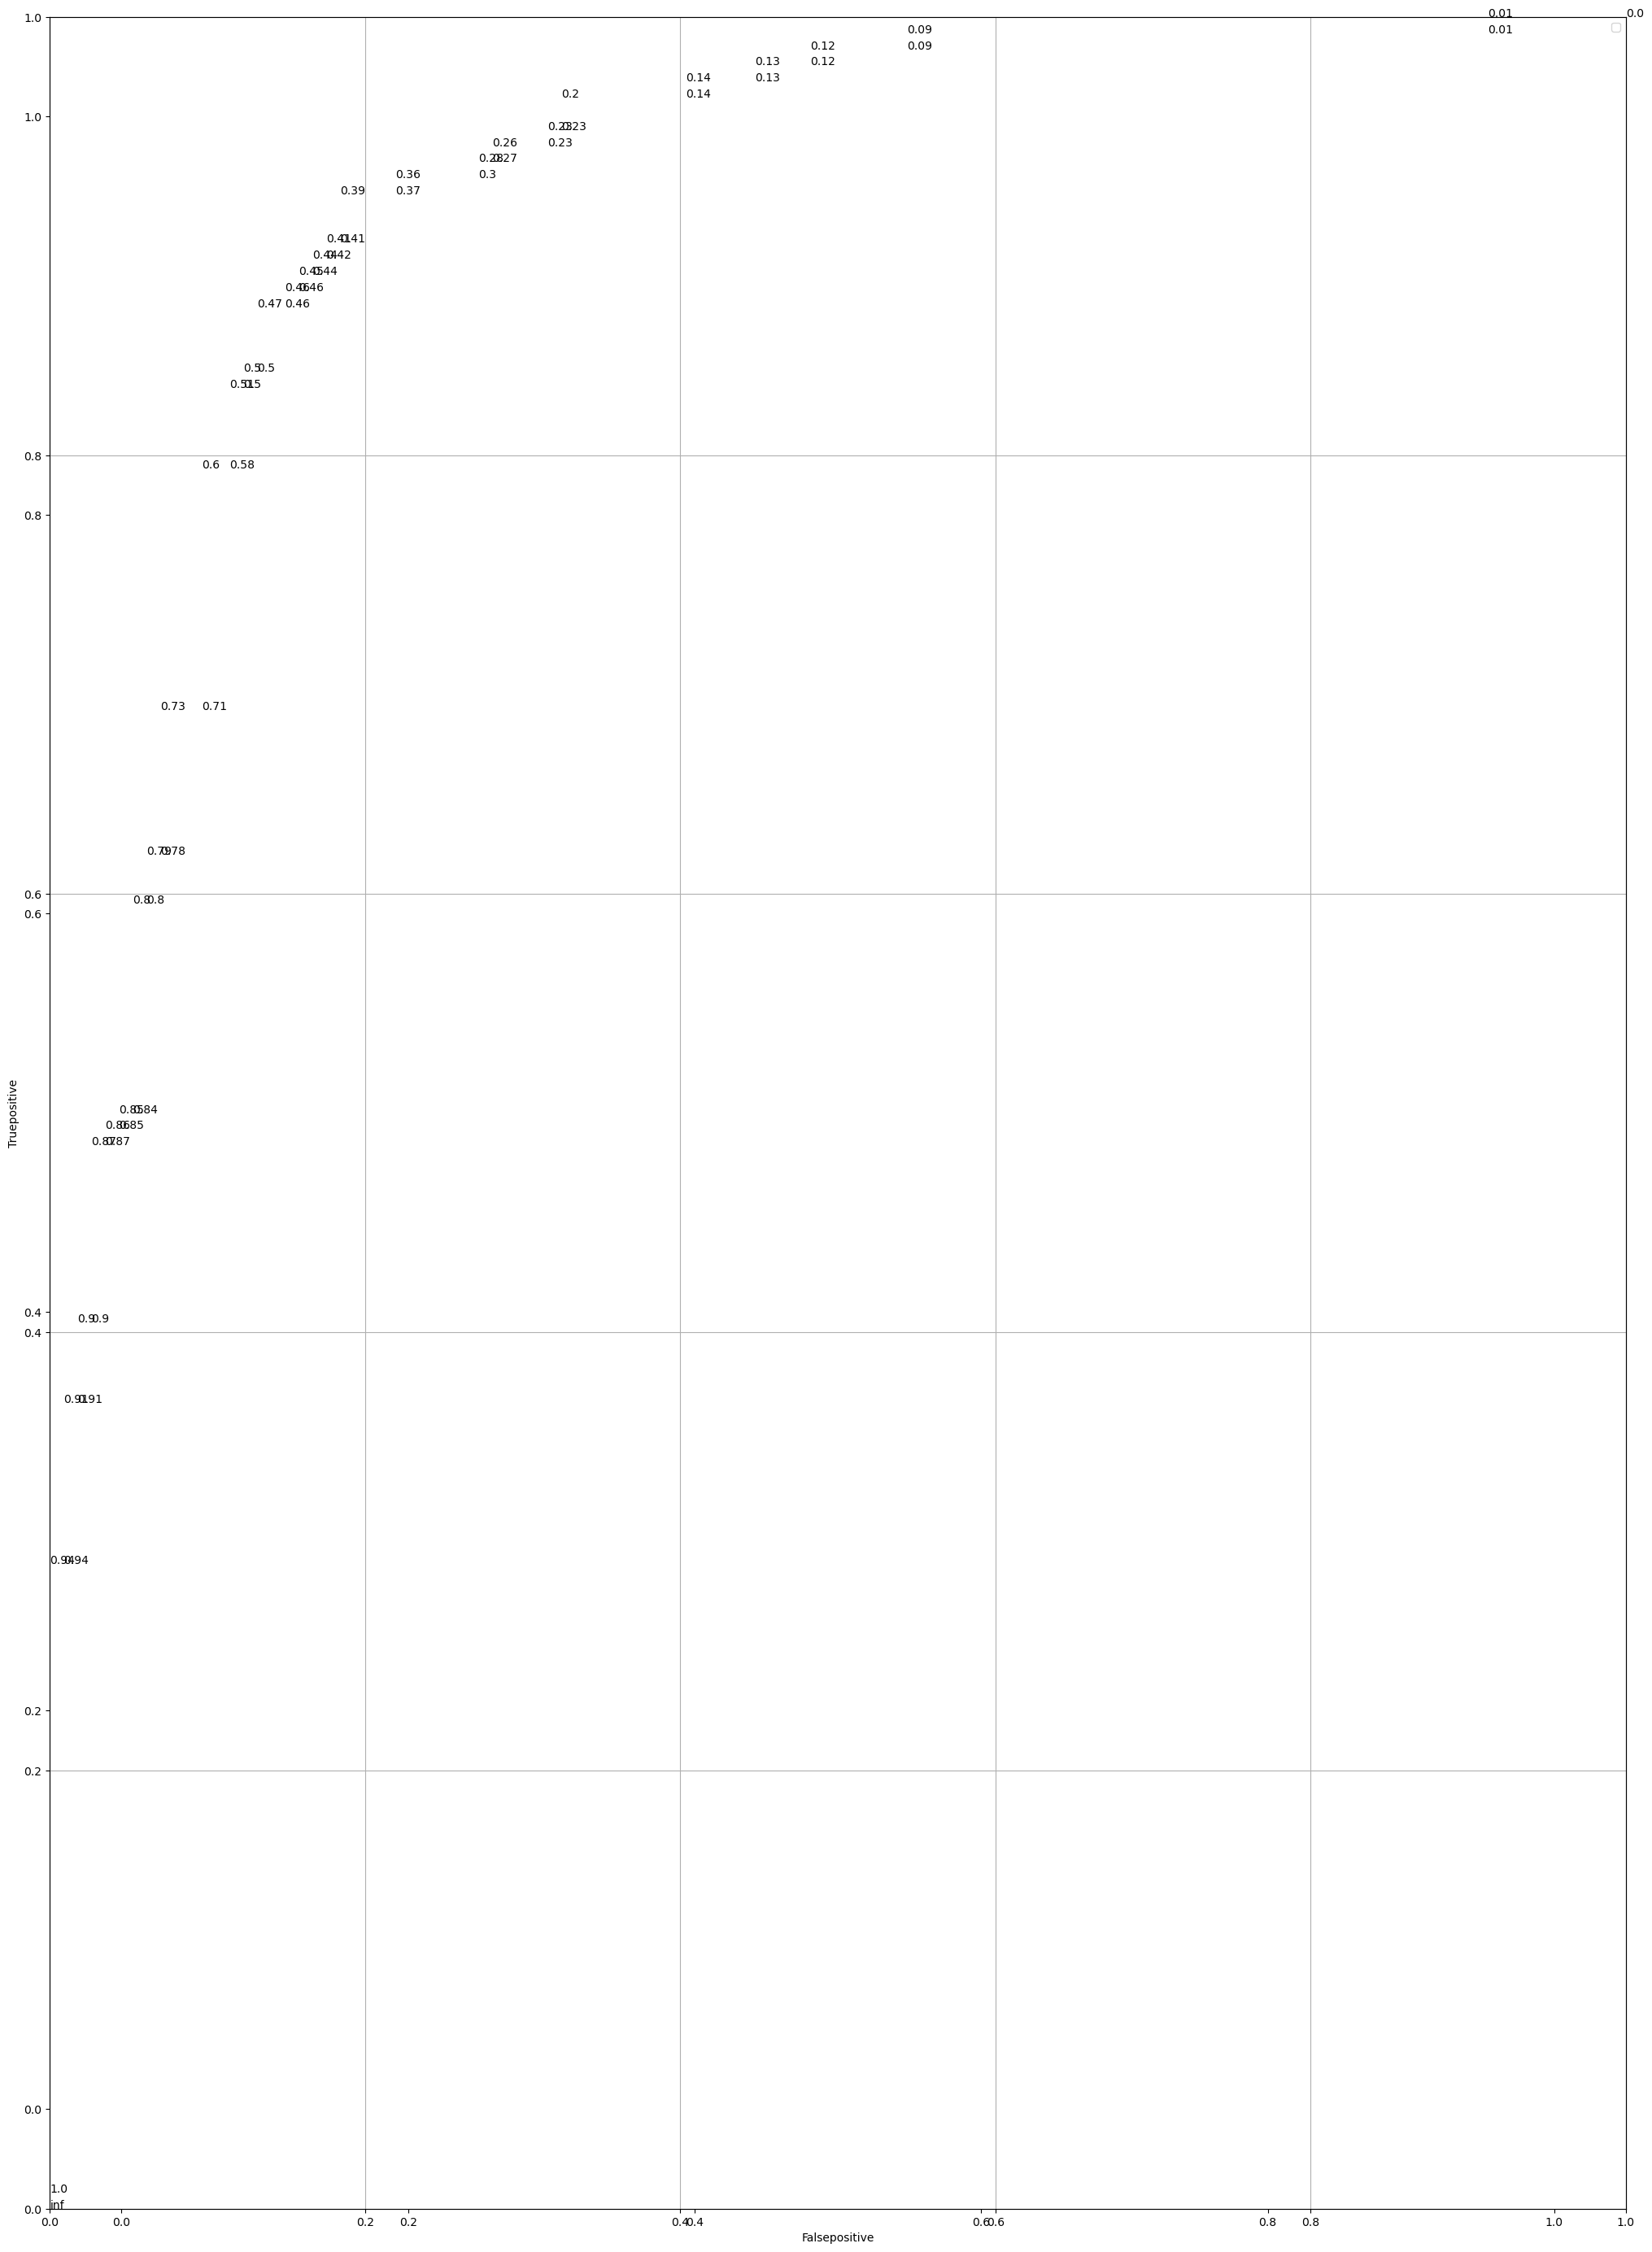

In [28]:
#plot roc_curve
fig=pyplot.figure(figsize=(25,35))
pyplot.plot(dumpy_fp,dumpy_tp,linestyle='--',label='DummyModel')
pyplot.plot(model_fp,model_tp,marker='*',label='Model_prob')
axis=fig.add_subplot(111)
for xyz in zip(model_fp,model_tp,thresholds):
    axis.annotate('%s' % np.round(xyz[2],2),xy=(xyz[0],xyz[1]))  
pyplot.xlabel('Falsepositive')
pyplot.ylabel('Truepositive')
axis.grid()
pyplot.legend()
pyplot.show()



In [53]:
dumpy_fp

array([0., 1.])

In [64]:
for xyz in zip(model_fp,model_tp,thresholds):
    print(xyz)

(0.0, 0.0, inf)
(0.0, 0.007352941176470588, 0.9995537641436246)
(0.0, 0.29411764705882354, 0.9394969874847566)
(0.008771929824561403, 0.29411764705882354, 0.936732024794069)
(0.008771929824561403, 0.36764705882352944, 0.9132524135766692)
(0.017543859649122806, 0.36764705882352944, 0.9099918531626412)
(0.017543859649122806, 0.40441176470588236, 0.8952707817507121)
(0.02631578947368421, 0.40441176470588236, 0.8950362624710901)
(0.02631578947368421, 0.4852941176470588, 0.8699135690041936)
(0.03508771929824561, 0.4852941176470588, 0.8660438442118609)
(0.03508771929824561, 0.49264705882352944, 0.857581726911582)
(0.043859649122807015, 0.49264705882352944, 0.8488103151949314)
(0.043859649122807015, 0.5, 0.8451407833318586)
(0.05263157894736842, 0.5, 0.8426238735010158)
(0.05263157894736842, 0.5955882352941176, 0.8033710566971212)
(0.06140350877192982, 0.5955882352941176, 0.8012824754397205)
(0.06140350877192982, 0.6176470588235294, 0.7894593431712312)
(0.07017543859649122, 0.6176470588235294

In [29]:
fig, ax = plt.subplots(figsize=(12,10))

# Plotting with labels
ax.plot(dumpy_fp, dumpy_tp, linestyle='--', label='DummyModel')  # Correct label
ax.plot(model_fp, model_tp, marker='*', label='Model_prob')      # Correct label

# Annotate points on the model
for xyz in zip(model_fp, model_tp, thresholds):
    ax.annotate(f'{np.round(xyz[2], 2)}', xy=(xyz[0], xyz[1]), 
                textcoords="offset points", xytext=(0,10), ha='center')

# Legend call
ax.legend()  # Make sure this is called after all plots

# Additional plot formatting
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve')
ax.grid()
plt.show()

NameError: name 'plt' is not defined

In [30]:
import matplotlib.pyplot as plt

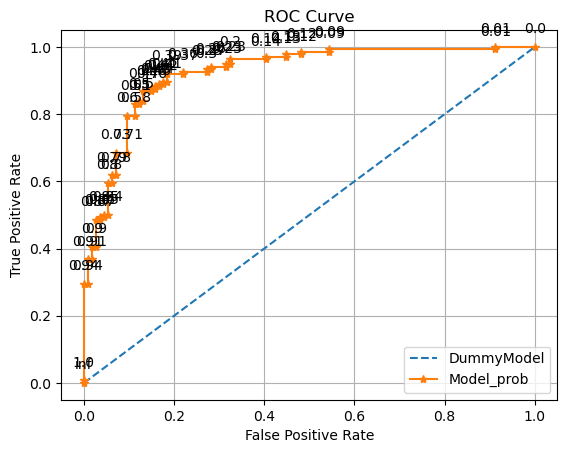

In [31]:
fig, ax = plt.subplots()

# Plotting with labels
ax.plot(dumpy_fp, dumpy_tp, linestyle='--', label='DummyModel')  # Correct label
ax.plot(model_fp, model_tp, marker='*', label='Model_prob')      # Correct label

# Annotate points on the model
for xyz in zip(model_fp, model_tp, thresholds):
    ax.annotate(f'{np.round(xyz[2], 2)}', xy=(xyz[0], xyz[1]), 
                textcoords="offset points", xytext=(0,10), ha='center')

# Legend call
ax.legend()  # Make sure this is called after all plots

# Additional plot formatting
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve')
ax.grid()
plt.show()